In [1]:
import pandas as pd
from pandas import read_csv

Sensors = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa2_timeline.csv",
                     sep = ",")
Sensors.set_index("channel", inplace = True)
Sensors = Sensors.applymap(lambda x: x.replace("*", ""))

df = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/ViaBolz.csv",
             sep = ",",
             parse_dates = ["ts"])
df.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
df = df.rename(columns=change)


In [2]:
Test = {}
maxim = len(Sensors.columns)
for i,col in enumerate(Sensors.columns):
    materials = []
    if i == maxim-1:
        for j,material in enumerate(Sensors[col]):
            f = materials.count(material)+1            
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                     df[col:][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })])
            else:
                Test[material + str(f)] = df[col:][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })    
    else:
        for j,material in enumerate(Sensors[col]):
            f = materials.count(material)+1            
            materials.append(material)
            if list(Test.keys()).count(material + str(f)) == 1:
                Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                     df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })
                                                    ])
            else:
                Test[material + str(f)] = df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                   "T"+str(j+1),
                                                                   "V"+str(j+1)]].rename(columns = {
                                                         "R"+str(j+1):"R",
                                                         "T"+str(j+1):"HT",
                                                         "V"+str(j+1):"V"
                                                     })


In [3]:
Test

{'LaFeO31':                                      R     HT     V
 ts                                                 
 2021-01-13 10:13:00+00:00  131072000.0   53.8  0.35
 2021-01-13 10:14:00+00:00  131072000.0   54.4  0.35
 2021-01-13 10:15:00+00:00  131072000.0   54.4  0.35
 2021-01-13 10:16:00+00:00  131072000.0   55.1  0.36
 2021-01-13 10:17:00+00:00  131072000.0   54.4  0.35
 ...                                ...    ...   ...
 2023-06-26 09:07:00+00:00    1702234.0  112.2  3.36
 2023-06-26 09:08:00+00:00    1702234.0  112.1  3.36
 2023-06-26 09:09:00+00:00    1680410.0  112.2  3.36
 2023-06-26 09:10:00+00:00    1680410.0  112.1  3.36
 2023-06-26 09:12:00+00:00    1702234.0  112.3  3.36
 
 [1179074 rows x 3 columns],
 'LaFeO32':                                      R     HT      V
 ts                                                  
 2021-01-13 10:13:00+00:00  131072000.0  56.50  0.350
 2021-01-13 10:14:00+00:00  131072000.0  55.00  0.350
 2021-01-13 10:15:00+00:00  131072000.0  5

In [4]:
import matplotlib.pyplot as plt

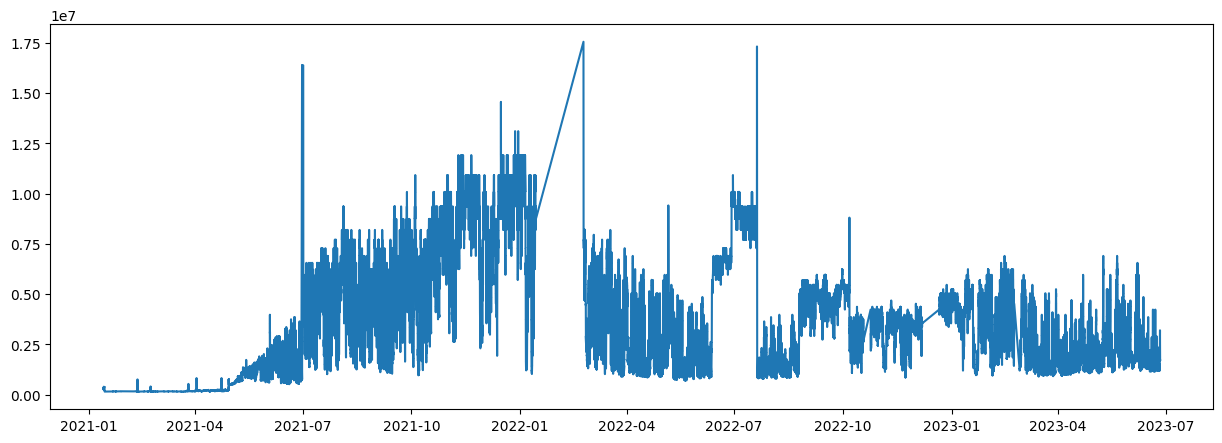

In [5]:
df1 = Test["LaFeO31"]

df1 = df1.loc[df1.R < 0.18e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df1.index, df1.R)
plt.show()

# Sensore 2

[]

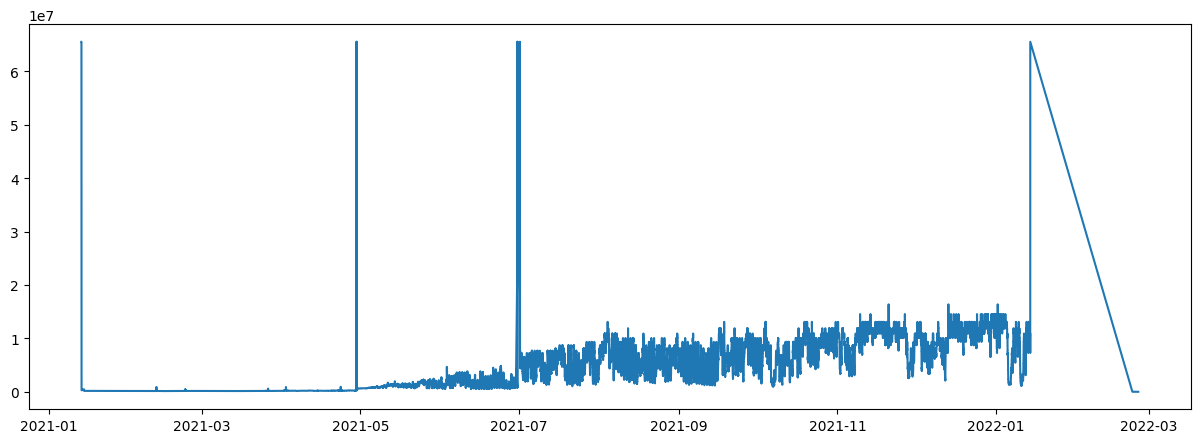

In [ ]:
df2 = Test["LaFeO32"]

df2 = df2.loc[df2.R < 0.7e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df2.index, df2.R)
plt.plot()

# Sensore 3

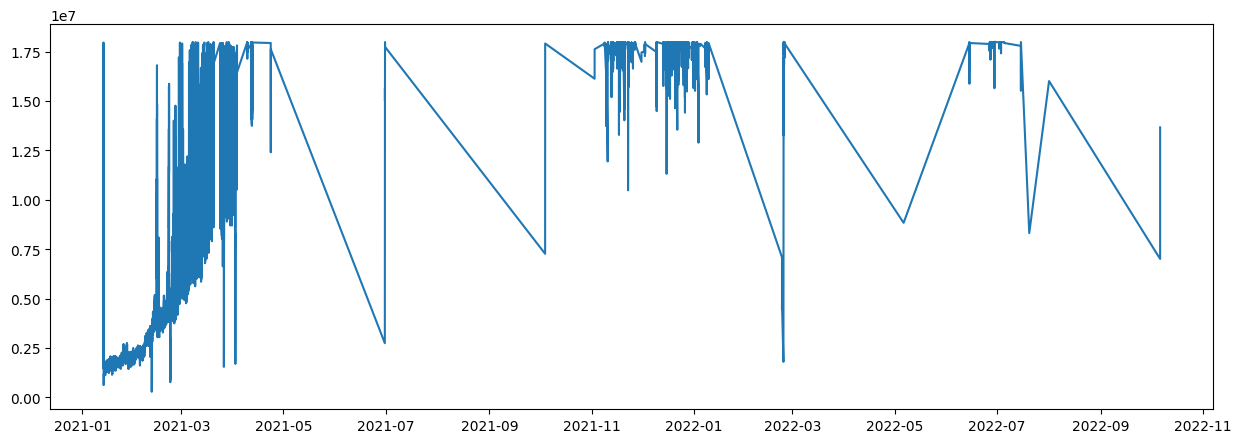

In [ ]:
df3 = Test["WO31"]
""" Maybe very bad sensor??? Always saturating or breaking??? """
df3 = df3.loc[df3.R < 0.18e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df3.index, df3.R)
plt.show()

# Sensore 4

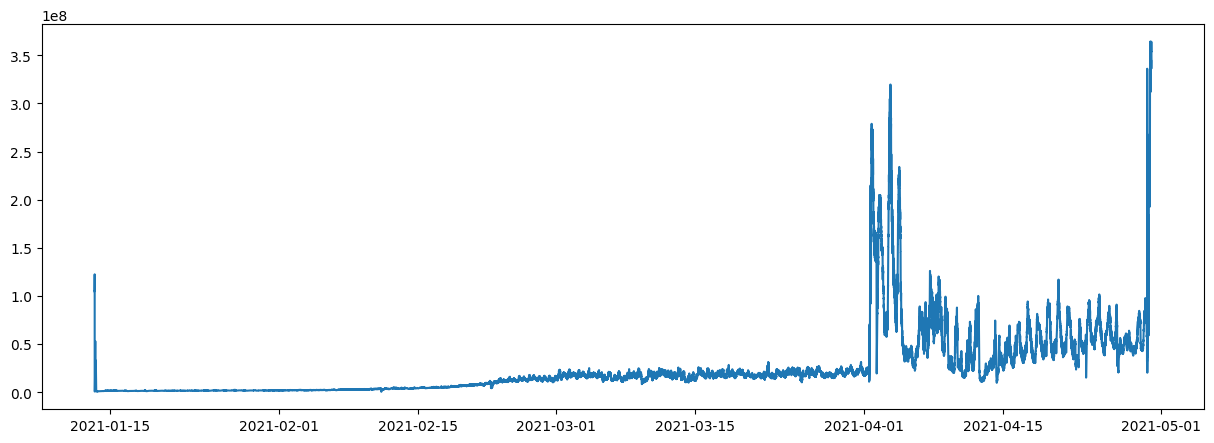

In [ ]:
df4 = Test["WO32"]
df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df4.index, df4.R)
plt.show()

# Sensore 5

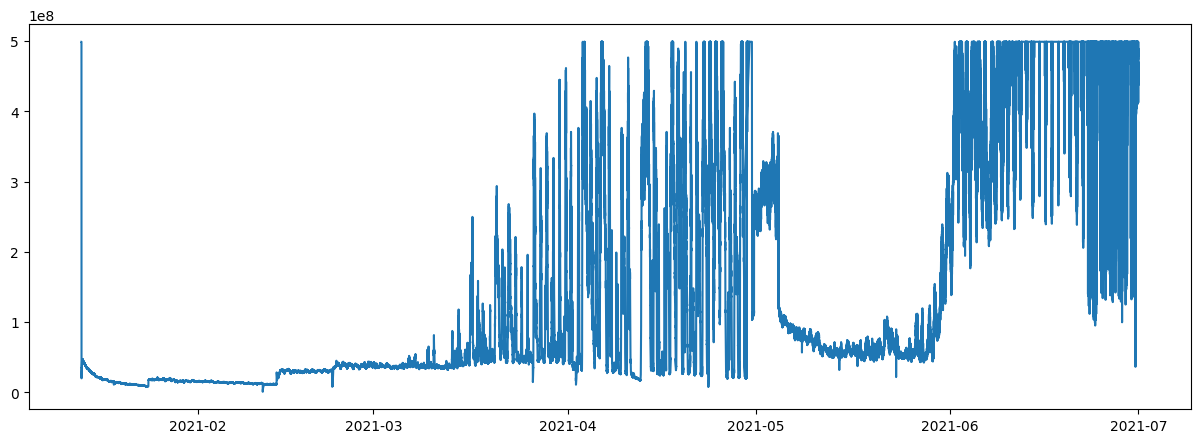

In [ ]:
df5 = Test["ZnO1"]
"Bad sensor?? Saturation always occurs after half 03/2021"
# df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df5.index, df5.R)
plt.show()

# Sensore 6

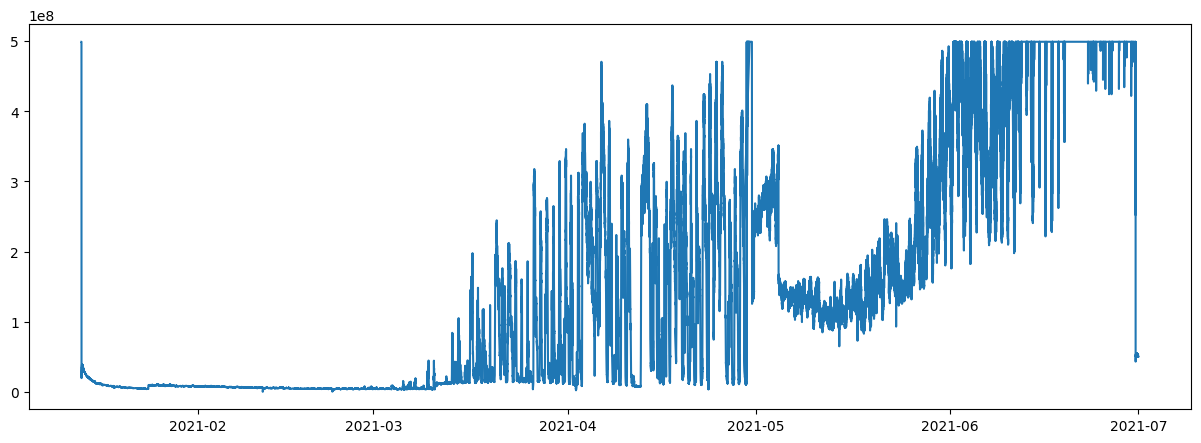

In [ ]:
df6 = Test["ZnO2"]

"""Reaches saturation after 06/2021"""
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df6 = df6.loc[df6.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df6.index, df6.R)
plt.show()

# Sensore 7

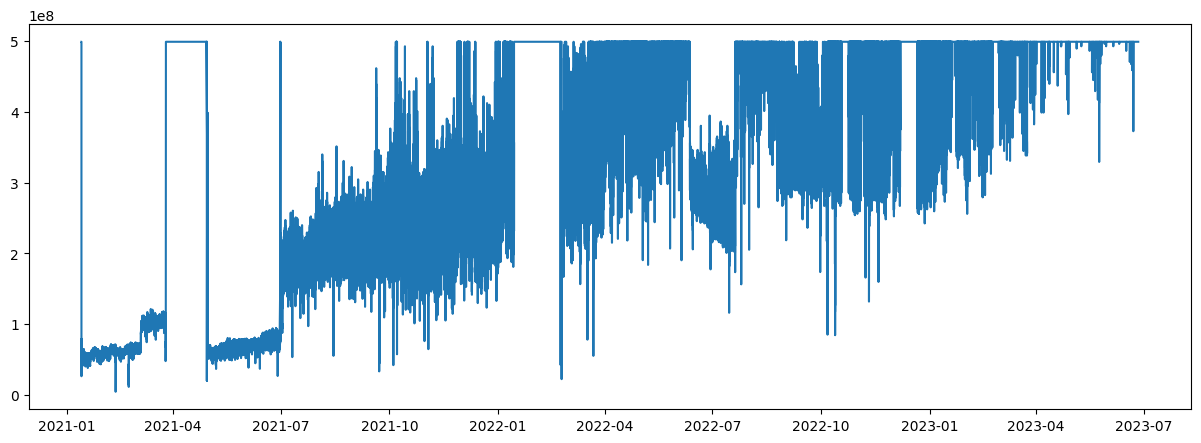

In [ ]:
df7 = Test["STN1"]

""" Surely a very bad sensor, saturated during almost for all the time"""
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df7 = df7.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df7.index, df7.R)
plt.show()

# Sensore 8

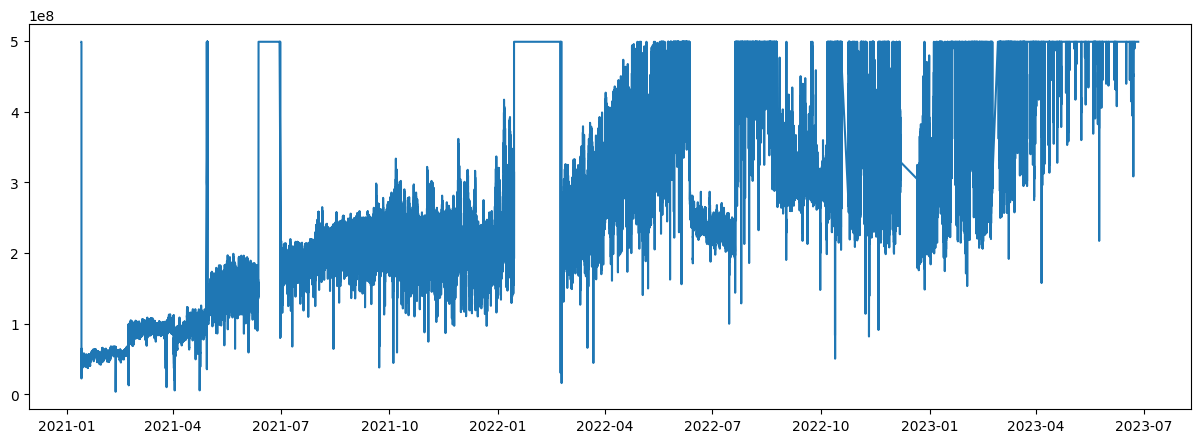

In [ ]:
df8 = Test["STN2"]

""" Also a very bad sensor, always saturated after 04/2021 """
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df8 = df8.loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df8.index, df8.R)
plt.show()

# Sensore 9

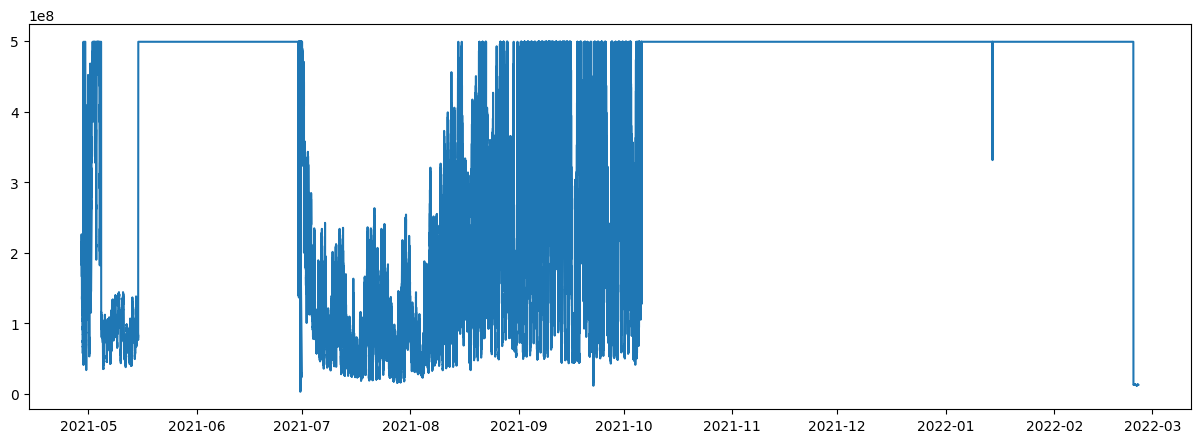

In [ ]:
df9 = Test["ZnOg1"]

""" Very Bad one, almost no good data"""
# Pulisco le saturazioni o altri errori causati dal sensore : 
# df9 = df9.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))
plt.plot(df9.index, df9.R)
plt.show()

# Sensore 10
Heater rotto, solo una parte funzionante

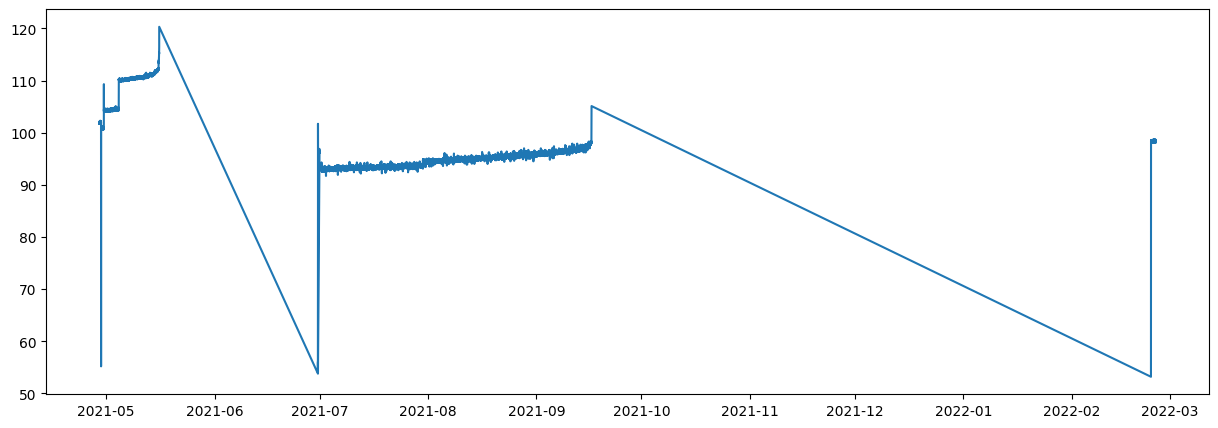

In [ ]:
df10 = Test["ZnOg2"]


# Pulisco le saturazioni o altri errori causati dal sensore : 
df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))
plt.plot(df10.index, df10.HT)
plt.show()

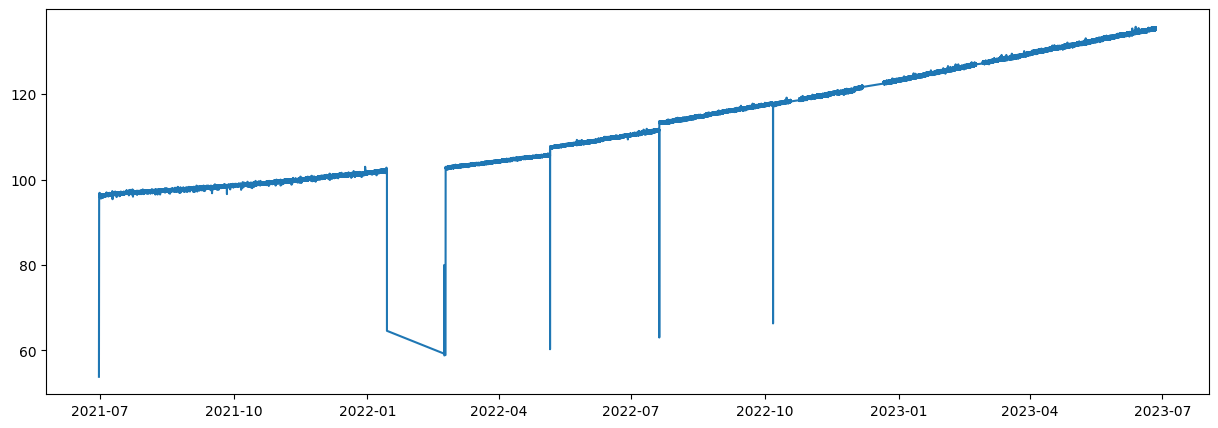

In [ ]:
df11 = Test["ZnOR1"]

# Pulisco le saturazioni o altri errori causati dal sensore : 
df11 = df11.loc[df11.HT < 300]
fig = plt.figure(figsize=(15,5))
plt.plot(df11.index, df11.HT)
plt.show()

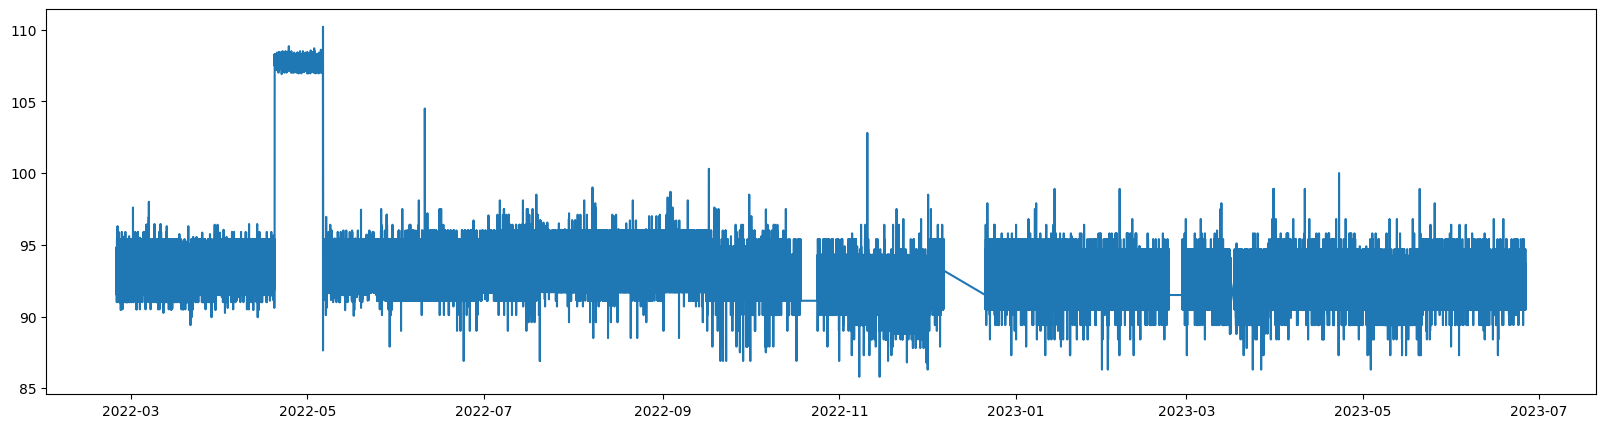

In [ ]:
df12 = Test["CNT1"]

# Pulisco le saturazioni o altri errori causati dal sensore : 
df12 = df12.loc[df12.HT < 1000]
fig = plt.figure(figsize=(20,5))
plt.plot(df12.index, df12.HT)
plt.show()

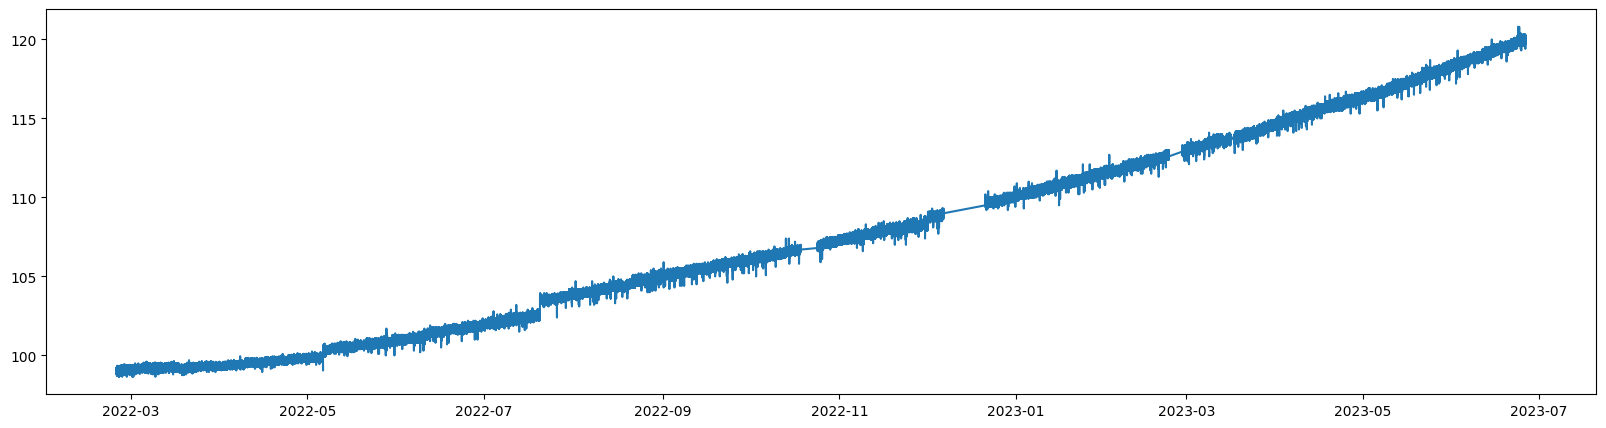

In [ ]:
df13 = Test["SmFeO31"]

# Pulisco le saturazioni o altri errori causati dal sensore : 
df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(20,5))
plt.plot(df13.index, df13.HT)
plt.show()

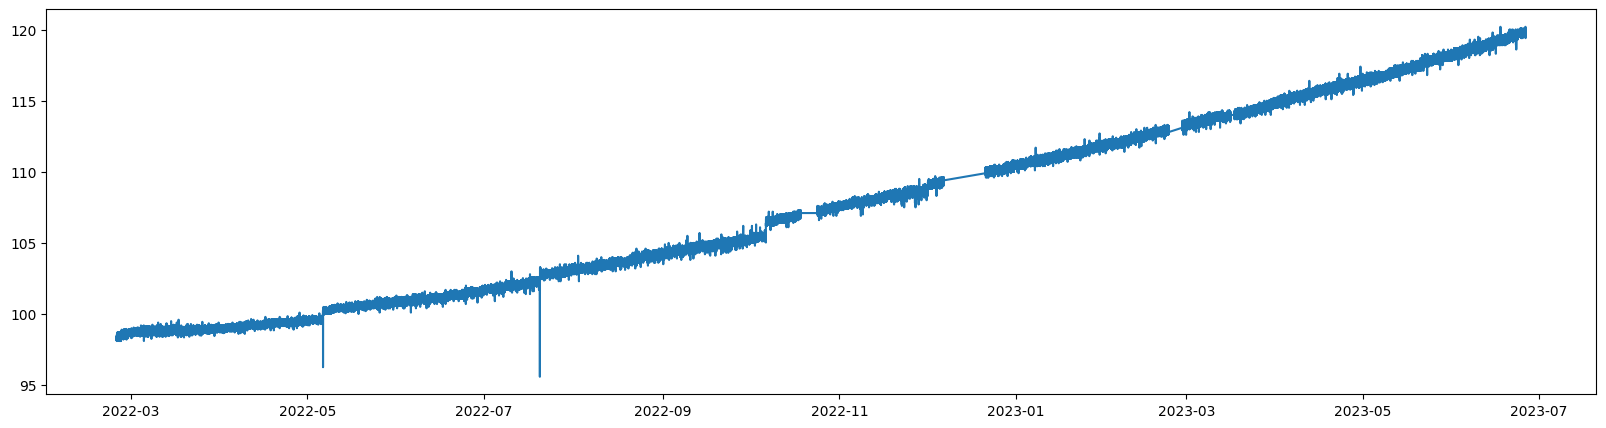

In [ ]:
df14 = Test['SmFeO32']

# Pulisco le saturazioni o altri errori causati dal sensore : 
df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(20,5))
plt.plot(df14.index, df14.HT)
plt.show()


In [57]:
from datetime import date, timedelta

# Gap 1 14-01-2022 to 23-02-2022

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-28
2021-06-12
2021-07-01
2021-08-19
2021-10-02
2021-11-11
2021-11-26
2021-12-09
2022-01-15
2022-01-16
2022-01-17
2022-01-18
2022-01-19
2022-01-20
2022-01-21
2022-01-22
2022-01-23
2022-01-24
2022-01-25
2022-01-26
2022-01-27
2022-01-28
2022-01-29
2022-01-30
2022-01-31
2022-02-01
2022-02-02
2022-02-03
2022-02-04
2022-02-05
2022-02-06
2022-02-07
2022-02-08
2022-02-09
2022-02-10
2022-02-11
2022-02-12
2022-02-13
2022-02-14
2022-02-15
2022-02-16
2022-02-17
2022-02-18
2022-02-19
2022-02-20
2022-02-21
2022-02-22
2022-02-23
2022-08-22
2022-09-28
2022-10-18
2022-10-19
2022-10-20
2022-10-21
2022-10-22
2022-10-23
2022-10-24
2022-10-29
2022-10-31
2022-12-08
2022-12-09
2022-12-10
2022-12-11
2022-12-12
2022-12-13
2022-12-14
2022-12-15
2022-12-16
2022-12-17
2022-12-18
2022-12-19
2022-12-20
2022-12-21
2023-01-16
2023-01-28
2023-02-23
2023-02-24

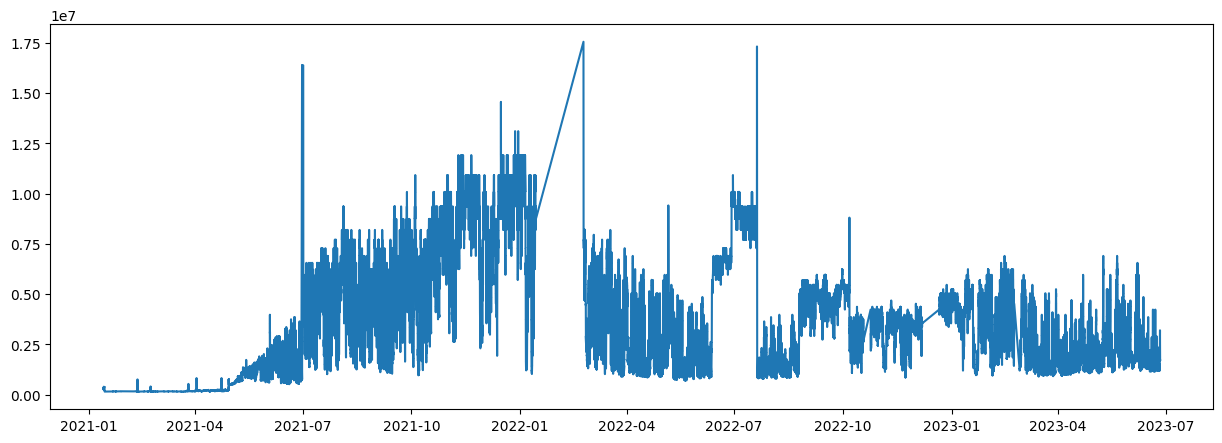

97


In [55]:
# df1 = Test["LaFeO31"]

# df1 = df1.loc[df1.R < 0.18e8]
# fig = plt.figure(figsize=(15,5))

# df_slice1 = df1["2022-01-14" : "2022-02-23"]
# plt.plot(df_slice1.index, df_slice1.R)
# plt.show()


df1 = Test["LaFeO31"]

df1 = df1.loc[df1.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice1 = df1[single_date.strftime("%Y-%m-%d"):]
        type(df_slice1.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice1 = df1[:]
plt.plot(df_slice1.index, df_slice1.R)
plt.show()
print(len(date_tot))

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-28
2021-06-12
2021-08-19
2021-10-02
2021-11-11
2021-11-26
2021-12-09
2022-01-15
2022-01-16
2022-01-17
2022-01-18
2022-01-19
2022-01-20
2022-01-21
2022-01-22
2022-01-23
2022-01-24
2022-01-25
2022-01-26
2022-01-27
2022-01-28
2022-01-29
2022-01-30
2022-01-31
2022-02-01
2022-02-02
2022-02-03
2022-02-04
2022-02-05
2022-02-06
2022-02-07
2022-02-08
2022-02-09
2022-02-10
2022-02-11
2022-02-12
2022-02-13
2022-02-14
2022-02-15
2022-02-16
2022-02-17
2022-02-18
2022-02-19
2022-02-20
2022-02-21
2022-02-22
2022-02-23
2022-02-25
2022-02-26
2022-02-27
2022-02-28
2022-03-01
2022-03-02
2022-03-03
2022-03-04
2022-03-05
2022-03-06
2022-03-07
2022-03-08
2022-03-09
2022-03-10
2022-03-11
2022-03-12
2022-03-13
2022-03-14
2022-03-15
2022-03-16
2022-03-17
2022-03-18
2022-03-19
2022-03-20
2022-03-21
2022-03-22
2022-03-23
2022-03-24
2022-03-25
2022-03-26

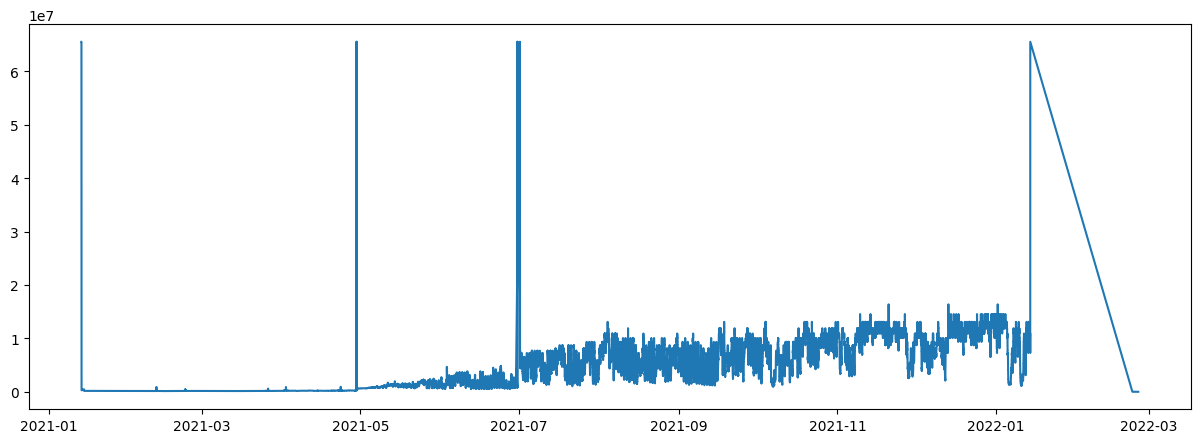

536


In [56]:
# df2 = Test["LaFeO32"]

# df2 = df2.loc[df2.R < 0.7e8]
# fig = plt.figure(figsize=(15,5))

# df_slice2=df2["2022-01-14":"2022-03-23"]
# plt.plot(df_slice2.index, df_slice2.R)
# plt.plot()

df2 = Test["LaFeO32"]

df2 = df2.loc[df2.R < 0.7e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice2 = df2[single_date.strftime("%Y-%m-%d"):]
        type(df_slice2.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice2 = df2[:]
plt.plot(df_slice2.index, df_slice2.R)
plt.show()
print(len(date_tot))

GAP 3-4

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-07
2021-03-10
2021-03-14
2021-03-15
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01
2021-04-02
2021-04-03
2021-04-04
2021-04-05
2021-04-06
2021-04-07
2021-04-08
2021-04-09
2021-04-10
2021-04-11
2021-04-13
2021-04-14
2021-04-15
2021-04-16
2021-04-17
2021-04-18
2021-04-19
2021-04-20
2021-04-21
2021-04-22
2021-04-23
2021-04-24
2021-04-25
2021-04-26
2021-04-27
2021-04-28
2021-04-29
2021-04-30
2021-05-01
2021-05-02
2021-05-03
2021-05-04
2021-05-05
2021-05-06
2021-05-07
2021-05-08
2021-05-09
2021-05-10
2021-05-11
2021-05-12
2021-05-13
2021-05-14
2021-05-15
2021-05-16
2021-05-17
2021-05-18
2021-05-19
2021-05-20
2021-05-21
2021-05-22
2021-05-23
2021-05-24
2021-05-25
2021-05-26
2021-05-27
2021-05-28
2021-05-29

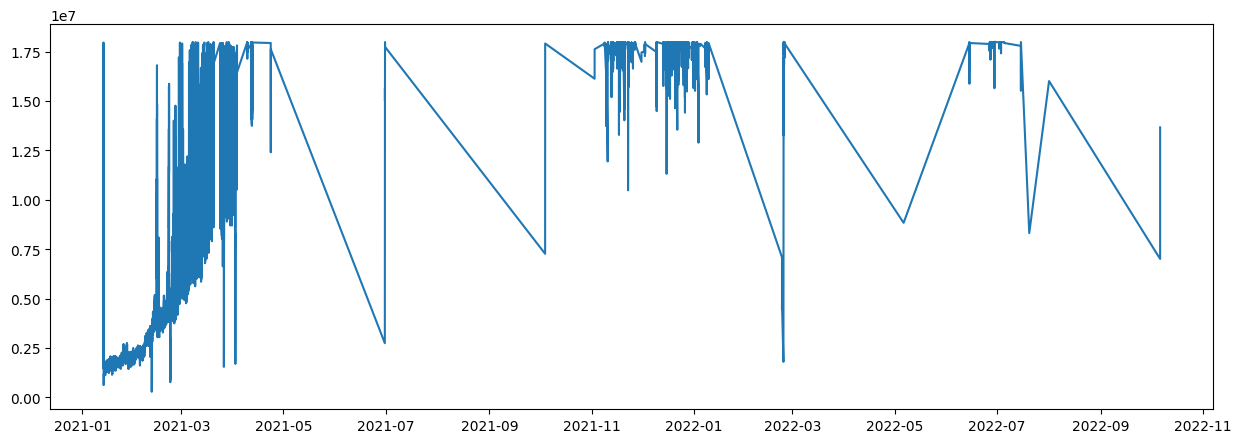

828


In [59]:
# df3 = Test["WO31"]

# df3 = df3.loc[df3.R < 0.18e8]
# fig = plt.figure(figsize=(15,5))
# print(df3)
# df_slice3 = df3["2022-01-14":]
# plt.plot(df_slice3.index, df_slice3.R)
# plt.show()

df3ù = Test["WO31"]

df3 = df3.loc[df3.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice3 = df3[single_date.strftime("%Y-%m-%d"):]
        type(df_slice3.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice3 = df3["":]
plt.plot(df_slice3.index, df_slice3.R)
plt.show()
print(len(date_tot))

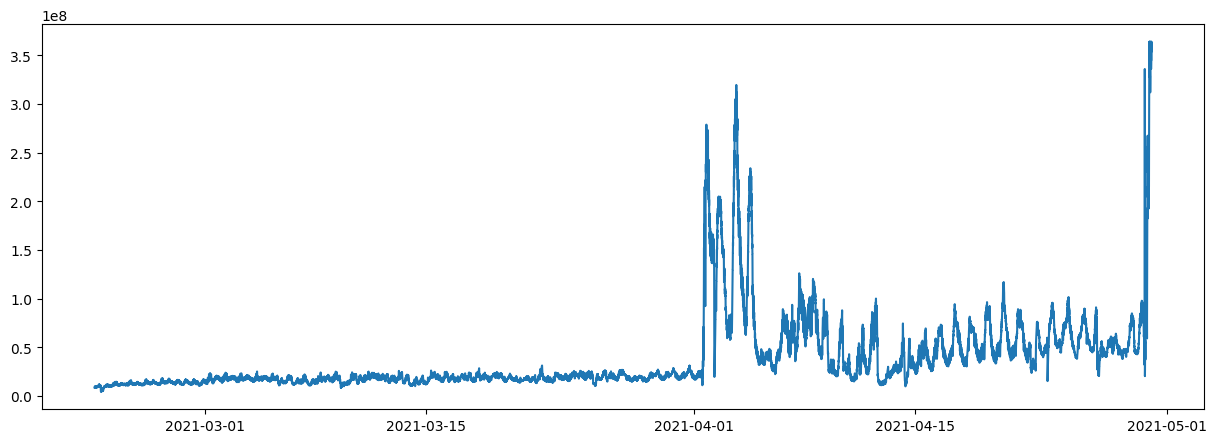

0


In [61]:
# df4 = Test["WO32"]

# df4 = df4.loc[df4.R < 3.7e8]
# fig = plt.figure(figsize=(15,5))
# print(df4)
# df_slice4 = df4[:]
# plt.plot(df_slice4.index, df_slice4.R)
# plt.show()


df4 = Test["WO32"]

df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice4 = df4[single_date.strftime("%Y-%m-%d"):]
        type(df_slice4.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice4 = df4["2021-02-22":"2022-03-07"]
plt.plot(df_slice4.index, df_slice4.R)
plt.show()
print(len(date_tot))

GAP 5-6

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-28
2021-04-30
2021-06-02
2021-06-03
2021-06-05
2021-06-09
2021-06-10
2021-06-11
2021-06-12
2021-06-13
2021-06-14
2021-06-15
2021-06-16
2021-06-17
2021-06-18
2021-06-19
2021-06-21
2021-06-22
2021-06-23
2021-06-24
2021-06-25
2021-06-26
2021-06-27
2021-06-28
2021-06-29
2021-06-30
2021-07-01
2021-07-02
2021-07-03
2021-07-04
2021-07-05
2021-07-06
2021-07-07
2021-07-08
2021-07-09
2021-07-10
2021-07-11
2021-07-12
2021-07-13
2021-07-14
2021-07-15
2021-07-16
2021-07-17
2021-07-18
2021-07-19
2021-07-20
2021-07-21
2021-07-22
2021-07-23
2021-07-24
2021-07-25
2021-07-26
2021-07-27
2021-07-28
2021-07-29
2021-07-30
2021-07-31
2021-08-01
2021-08-02
2021-08-03
2021-08-04
2021-08-05
2021-08-06
2021-08-07
2021-08-08
2021-08-09
2021-08-10
2021-08-11
2021-08-12
2021-08-13
2021-08-14
2021-08-15
2021-08-16
2021-08-17
2021-08-18
2021-08-19
2021-08-20

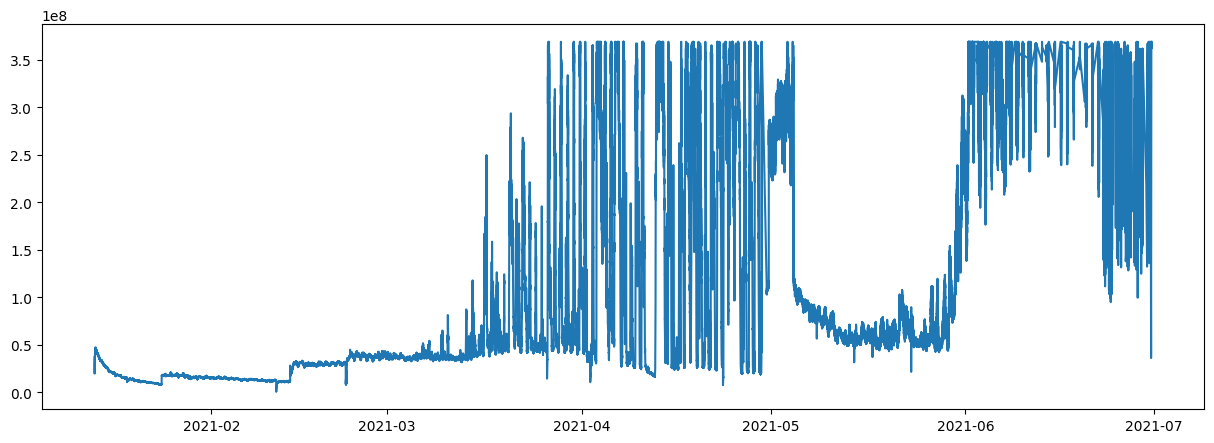

754


In [63]:
# df5 = Test["ZnO1"]

# df5 = df5.loc[df5.R < 3.7e8]
# fig = plt.figure(figsize=(15,5))
# print(df5)
# df_slice5 = df5[:]
# plt.plot(df_slice5.index, df_slice5.R)
# plt.show()

df5 = Test["ZnO1"]

df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice5 = df5[single_date.strftime("%Y-%m-%d"):]
        type(df_slice5.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice5 = df5[:]
plt.plot(df_slice5.index, df_slice5.R)
plt.show()
print(len(date_tot))

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-28
2021-06-12
2021-07-01
2021-07-02
2021-07-03
2021-07-04
2021-07-05
2021-07-06
2021-07-07
2021-07-08
2021-07-09
2021-07-10
2021-07-11
2021-07-12
2021-07-13
2021-07-14
2021-07-15
2021-07-16
2021-07-17
2021-07-18
2021-07-19
2021-07-20
2021-07-21
2021-07-22
2021-07-23
2021-07-24
2021-07-25
2021-07-26
2021-07-27
2021-07-28
2021-07-29
2021-07-30
2021-07-31
2021-08-01
2021-08-02
2021-08-03
2021-08-04
2021-08-05
2021-08-06
2021-08-07
2021-08-08
2021-08-09
2021-08-10
2021-08-11
2021-08-12
2021-08-13
2021-08-14
2021-08-15
2021-08-16
2021-08-17
2021-08-18
2021-08-19
2021-08-20
2021-08-21
2021-08-22
2021-08-23
2021-08-24
2021-08-25
2021-08-26
2021-08-27
2021-08-28
2021-08-29
2021-08-30
2021-08-31
2021-09-01
2021-09-02
2021-09-03
2021-09-04
2021-09-05
2021-09-06
2021-09-07
2021-09-08
2021-09-09
2021-09-10
2021-09-11
2021-09-12
2021-09-13

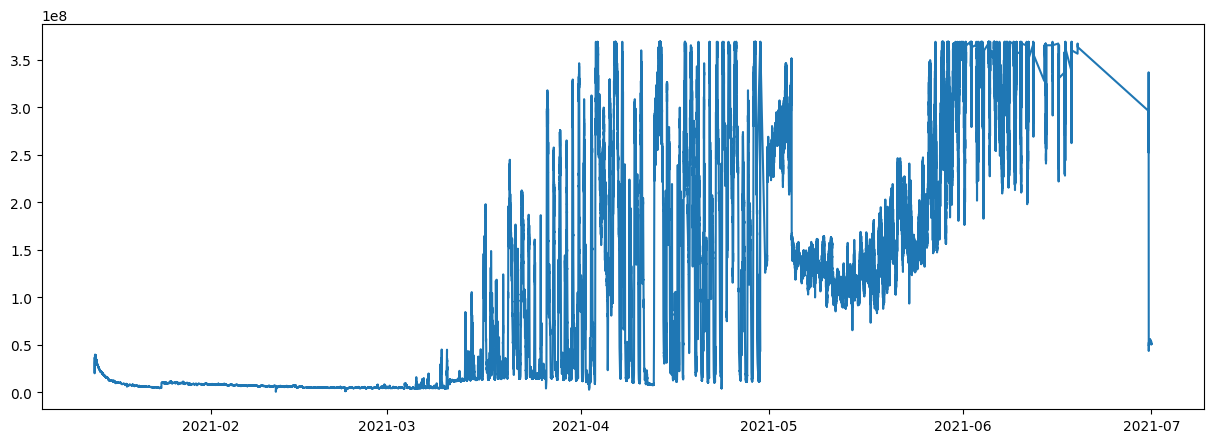

730


In [65]:
# df6 = Test["ZnO2"]

# df6 = df6.loc[df6.R < 3.7e8]
# fig = plt.figure(figsize=(15,5))
# print(df6)
# df_slice6 = df6[:]
# plt.plot(df_slice6.index, df_slice6.R)
# plt.show()


df6 = Test["ZnO2"]

df6 = df6.loc[df6.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice11 = df11[single_date.strftime("%Y-%m-%d"):]
        type(df_slice11.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice6 = df6[:]
plt.plot(df_slice6.index, df_slice6.R)
plt.show()
print(len(date_tot))

GAP 7-8

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01
2021-04-02
2021-04-03
2021-04-04
2021-04-05
2021-04-06
2021-04-07
2021-04-08
2021-04-09
2021-04-10
2021-04-11
2021-04-12
2021-04-13
2021-04-14
2021-04-15
2021-04-16
2021-04-17
2021-04-18
2021-04-19
2021-04-20
2021-04-21
2021-04-22
2021-04-23
2021-04-24
2021-04-25
2021-04-26
2021-04-27
2021-04-28
2021-04-29
2021-06-12
2021-08-17
2021-08-19
2021-09-20
2021-10-02
2021-10-07
2021-10-11
2021-10-14
2021-11-02
2021-11-04
2021-11-06
2021-11-11
2021-11-15
2021-11-17
2021-11-20
2021-11-26
2021-11-27
2021-11-28
2021-11-29
2021-12-05
2021-12-06
2021-12-07
2021-12-09
2021-12-12
2021-12-15
2021-12-30
2021-12-31
2022-01-01
2022-01-03
2022-01-04
2022-01-06
2022-01-07
2022-01-08
2022-01-11
2022-01-12
2022-01-14
2022-01-15
2022-01-16
2022-01-17
2022-01-18
2022-01-19
2022-01-20

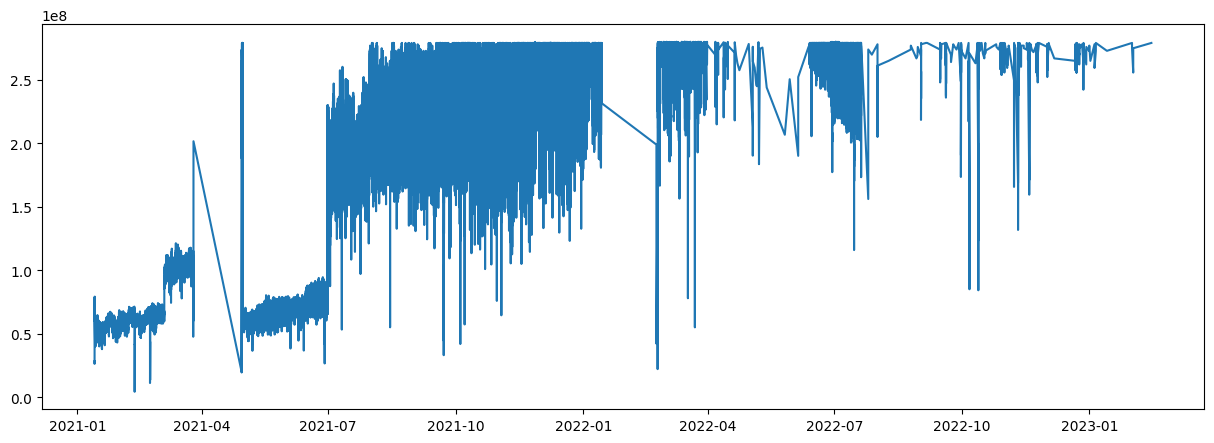

570


In [17]:
# df7 = Test["STN1"]

# df7 = df7.loc[df7.R < 2.8e8]
# fig = plt.figure(figsize=(15,5))
# print(df7)
# df_slice7 = df7[:]
# plt.plot(df_slice7.index, df_slice7.R)
# plt.show()



df7 = Test["STN1"]

df7 = df7.loc[df7.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice7 = df7[single_date.strftime("%Y-%m-%d"):]
        type(df_slice7.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice7 = df7[:]
plt.plot(df_slice7.index, df_slice7.R)
plt.show()
print(len(date_tot))

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-02-14
2021-03-28
2021-04-30
2021-06-12
2021-06-13
2021-06-14
2021-06-15
2021-06-16
2021-06-17
2021-06-18
2021-06-19
2021-06-20
2021-06-21
2021-06-22
2021-06-23
2021-06-24
2021-06-25
2021-06-26
2021-06-27
2021-06-28
2021-06-29
2021-06-30
2021-08-19
2021-10-02
2021-10-07
2021-11-11
2021-11-26
2021-11-28
2021-11-29
2021-12-09
2021-12-30
2022-01-06
2022-01-11
2022-01-15
2022-01-16
2022-01-17
2022-01-18
2022-01-19
2022-01-20
2022-01-21
2022-01-22
2022-01-23
2022-01-24
2022-01-25
2022-01-26
2022-01-27
2022-01-28
2022-01-29
2022-01-30
2022-01-31
2022-02-01
2022-02-02
2022-02-03
2022-02-04
2022-02-05
2022-02-06
2022-02-07
2022-02-08
2022-02-09
2022-02-10
2022-02-11
2022-02-12
2022-02-13
2022-02-14
2022-02-15
2022-02-16
2022-02-17
2022-02-18
2022-02-19
2022-02-20
2022-02-21
2022-02-22
2022-02-23
2022-02-26
2022-02-27
2022-03-01
2022-03-12
2022-03-20

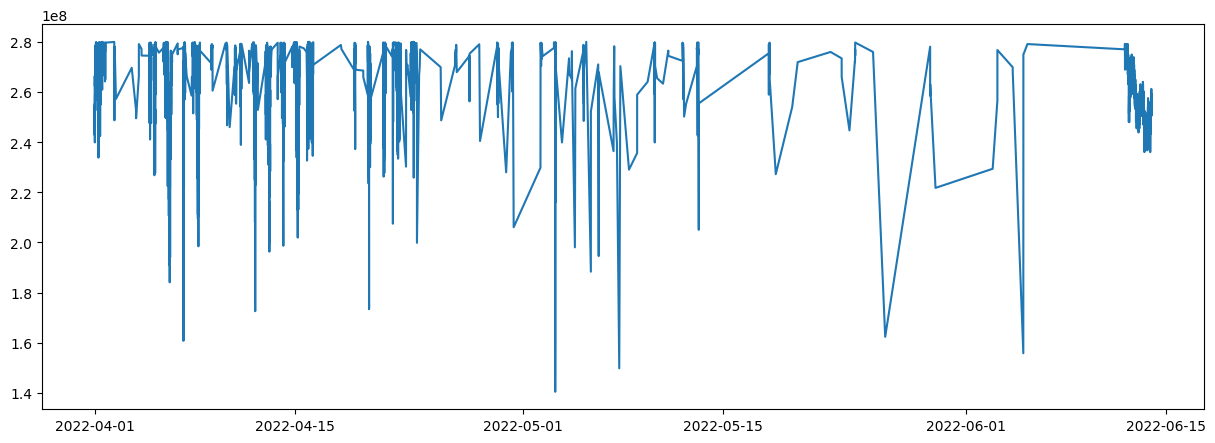

461


In [13]:
df8 = Test["STN2"]

df8 = df8.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice8 = df8[single_date.strftime("%Y-%m-%d"):]
        type(df_slice8.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice8 = df8["2022-04-01":"2022-06-13"]
plt.plot(df_slice8.index, df_slice8.R)
plt.show()
print(len(date_tot))

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-01-14
2021-01-15
2021-01-16
2021-01-17
2021-01-18
2021-01-19
2021-01-20
2021-01-21
2021-01-22
2021-01-23
2021-01-24
2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31
2021-02-01
2021-02-02
2021-02-03
2021-02-04
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
2021-02-10
2021-02-11
2021-02-12
2021-02-13
2021-02-14
2021-02-15
2021-02-16
2021-02-17
2021-02-18
2021-02-19
2021-02-20
2021-02-21
2021-02-22
2021-02-23
2021-02-24
2021-02-25
2021-02-26
2021-02-27
2021-02-28
2021-03-01
2021-03-02
2021-03-03
2021-03-04
2021-03-05
2021-03-06
2021-03-07
2021-03-08
2021-03-09
2021-03-10
2021-03-11
2021-03-12
2021-03-13
2021-03-14
2021-03-15
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24
2021-03-25
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01

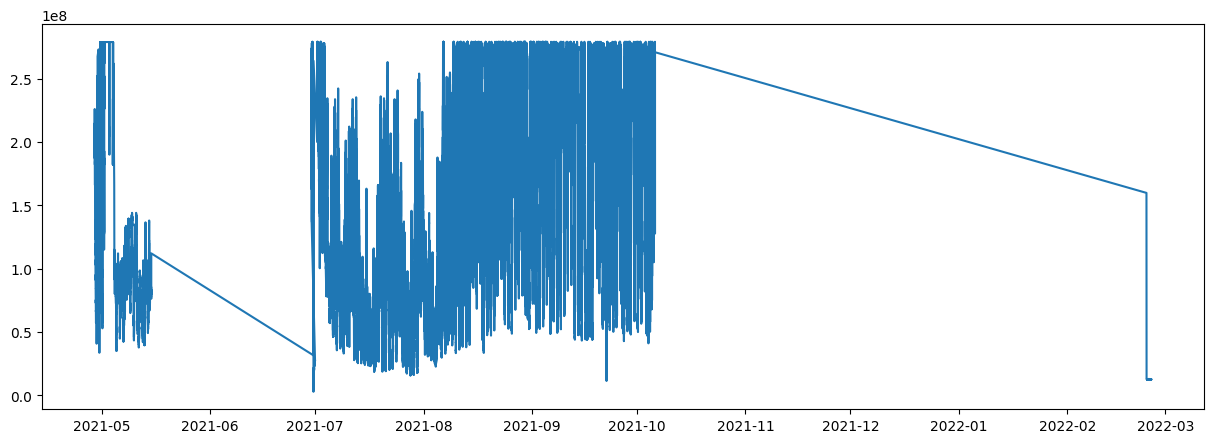

806


In [19]:
df9 = Test["ZnOg1"]

df9 = df9 .loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice9 = df9[single_date.strftime("%Y-%m-%d"):]
        type(df_slice9.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice9 = df9[:]
plt.plot(df_slice9.index, df_slice9.R)
plt.show()
print(len(date_tot))

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-01-14
2021-01-15
2021-01-16
2021-01-17
2021-01-18
2021-01-19
2021-01-20
2021-01-21
2021-01-22
2021-01-23
2021-01-24
2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31
2021-02-01
2021-02-02
2021-02-03
2021-02-04
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
2021-02-10
2021-02-11
2021-02-12
2021-02-13
2021-02-14
2021-02-15
2021-02-16
2021-02-17
2021-02-18
2021-02-19
2021-02-20
2021-02-21
2021-02-22
2021-02-23
2021-02-24
2021-02-25
2021-02-26
2021-02-27
2021-02-28
2021-03-01
2021-03-02
2021-03-03
2021-03-04
2021-03-05
2021-03-06
2021-03-07
2021-03-08
2021-03-09
2021-03-10
2021-03-11
2021-03-12
2021-03-13
2021-03-14
2021-03-15
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24
2021-03-25
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01

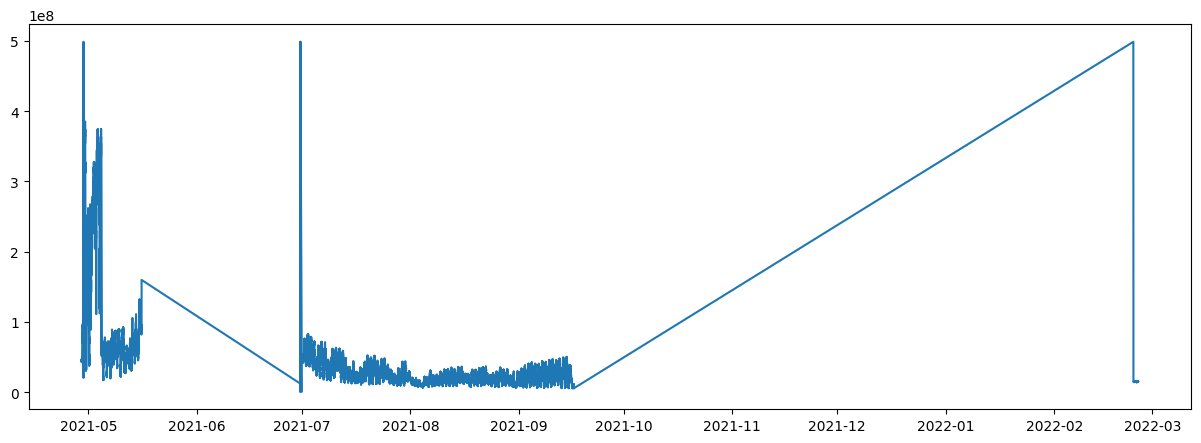

799


In [21]:
df10 = Test["ZnOg2"]

df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice10 = df10[single_date.strftime("%Y-%m-%d"):]
        type(df_slice10.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice10 = df10[:]
plt.plot(df_slice10.index, df_slice10.R)
plt.show()
print(len(date_tot))

2021-01-01
2021-01-02
2021-01-03
2021-01-04
2021-01-05
2021-01-06
2021-01-07
2021-01-08
2021-01-09
2021-01-10
2021-01-11
2021-01-12
2021-01-13
2021-01-14
2021-01-15
2021-01-16
2021-01-17
2021-01-18
2021-01-19
2021-01-20
2021-01-21
2021-01-22
2021-01-23
2021-01-24
2021-01-25
2021-01-26
2021-01-27
2021-01-28
2021-01-29
2021-01-30
2021-01-31
2021-02-01
2021-02-02
2021-02-03
2021-02-04
2021-02-05
2021-02-06
2021-02-07
2021-02-08
2021-02-09
2021-02-10
2021-02-11
2021-02-12
2021-02-13
2021-02-14
2021-02-15
2021-02-16
2021-02-17
2021-02-18
2021-02-19
2021-02-20
2021-02-21
2021-02-22
2021-02-23
2021-02-24
2021-02-25
2021-02-26
2021-02-27
2021-02-28
2021-03-01
2021-03-02
2021-03-03
2021-03-04
2021-03-05
2021-03-06
2021-03-07
2021-03-08
2021-03-09
2021-03-10
2021-03-11
2021-03-12
2021-03-13
2021-03-14
2021-03-15
2021-03-16
2021-03-17
2021-03-18
2021-03-19
2021-03-20
2021-03-21
2021-03-22
2021-03-23
2021-03-24
2021-03-25
2021-03-26
2021-03-27
2021-03-28
2021-03-29
2021-03-30
2021-03-31
2021-04-01

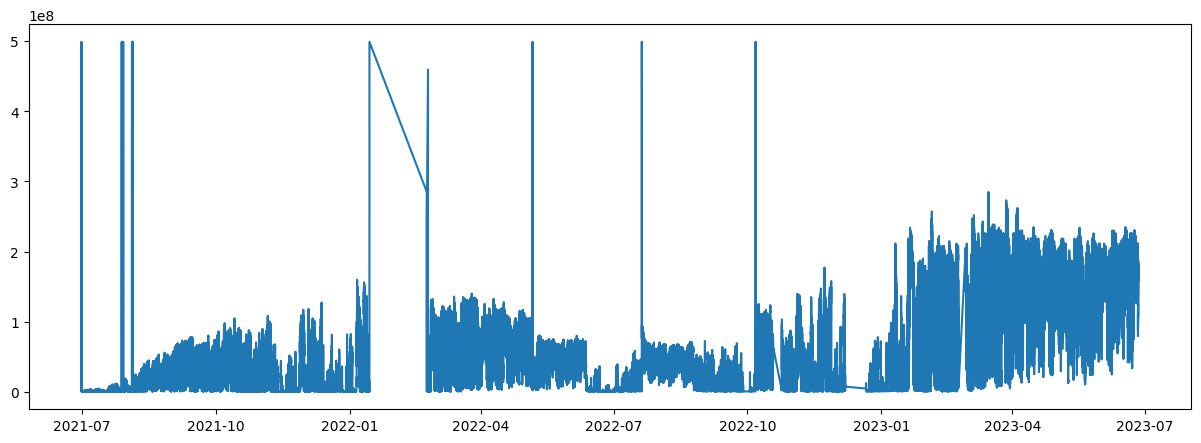

261


In [22]:
df11 = Test["ZnOR1"]

df11 = df11.loc[df11.HT < 300]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice11 = df11[single_date.strftime("%Y-%m-%d"):]
        type(df_slice11.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice11 = df11[:]
plt.plot(df_slice11.index, df_slice11.R)
plt.show()
print(len(date_tot))

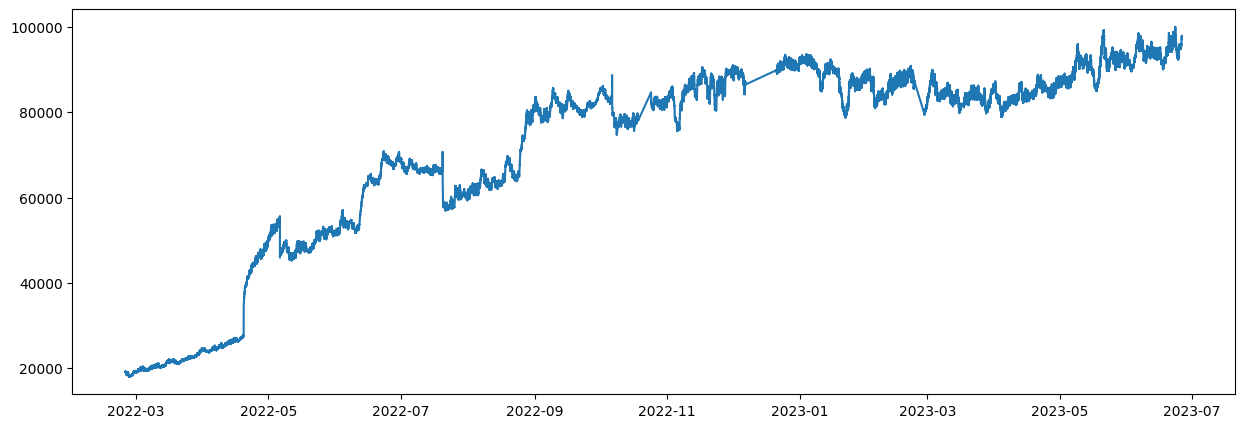

0


In [48]:
# df12 = Test["CNT1"]

# df12 = df12.loc[df12.HT < 1000]
# fig = plt.figure(figsize=(15,5))

# from datetime import date, timedelta

# start_date=date(2021,1,1)
# end_date=date(2023,6,15)
# date_tot=[]
# def daterange(start_date, end_date):
#     for n in range(int((end_date - start_date).days)):
#         yield start_date + timedelta(n)

# for single_date in daterange(start_date, end_date):
#     try:
#         df_slice12 = df12[single_date.strftime("%Y-%m-%d"):]
#         type(df_slice12.index)
#     except:
#         print(single_date)
#         date_tot.append(single_date)

# df_slice12 = df12[:]
# plt.plot(df_slice12.index, df_slice12.R)
# plt.show()
# print(len(date_tot))


df12 = Test["CNT1"]

df12 = df12.loc[df12.HT < 1000]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice12 = df12[single_date.strftime("%Y-%m-%d"):]
        type(df_slice12.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice12 = df12[:]
plt.plot(df_slice12.index, df_slice12.R)
plt.show()
print(len(date_tot))

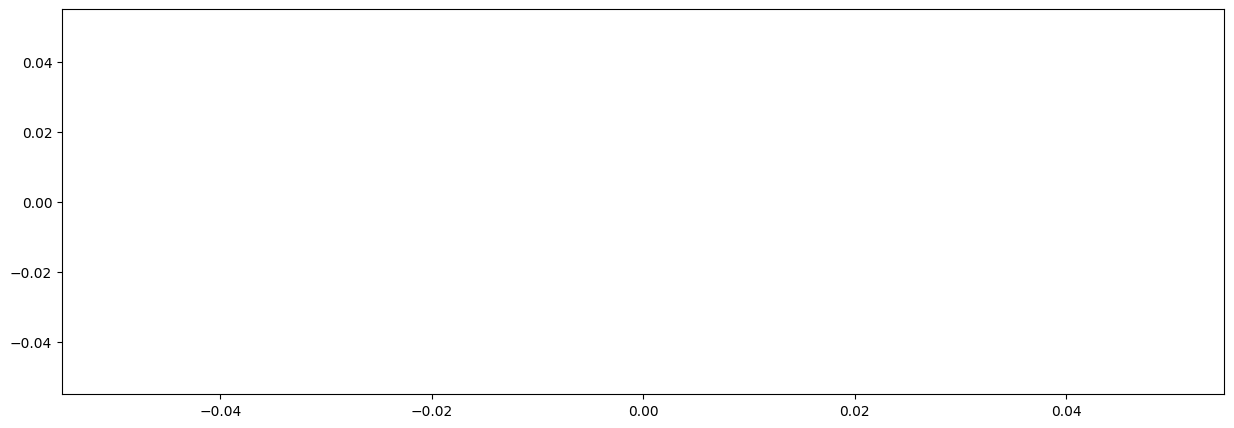

0


In [54]:
df14 = Test["SmFeO32"]

df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice14 = df14[single_date.strftime("%Y-%m-%d"):]
        type(df_slice14.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice14 = df14["2022-12-10":"2022-12-20"]
plt.plot(df_slice14.index, df_slice14.R)
plt.show()
print(len(date_tot))

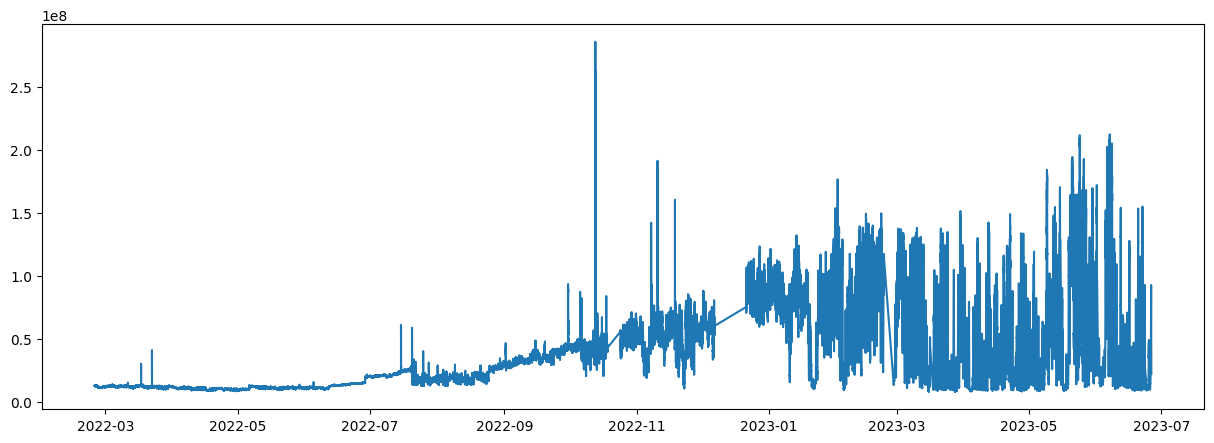

0


In [70]:
df13 = Test["SmFeO31"]

df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(15,5))

from datetime import date, timedelta

start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

for single_date in daterange(start_date, end_date):
    try:
        df_slice13 = df13[single_date.strftime("%Y-%m-%d"):]
        type(df_slice13.index)
    except:
        print(single_date)
        date_tot.append(single_date)

df_slice13 = df13[:]
plt.plot(df_slice13.index, df_slice13.R)
plt.show()
print(len(date_tot))